In [3]:
# ! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
  Using cached pycaret-3.2.0-py3-none-any.whl (484 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)
  Using cached tbats-1.1.3-py3-none-any.whl (44 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached plotly_resampler-0.9.2-py3-none-any.whl (81 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl (81 kB)
  Using cached schemdraw-0.15-py3-none-any.whl (106 kB)
  Using cached pyod-1.1.2-py3-none-any.whl
  Using cached sktime-0.21.1-py3-none-any.whl (17.1 MB)
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Using cached pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.1 MB)
  Using cached matplotlib-3.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached deprecati

In [3]:
import warnings
# 不要な警告文非表示
warnings.filterwarnings("ignore")
from pycaret.classification import *
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
feat_set = {'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'RevLineCr', 'LowDoc', 'DisbursementDate',
       'Sector', 'ApprovalDate', 'ApprovalFY', 'City', 'State',
       'BankState', 'DisbursementGross', 'GrAppv', 'SBA_Appv', 'UrbanRural'}
target = 'MIS_Status'

In [5]:
! ls ./*

./df_test_onehot_enc.csv   ./preprocessing_onehot.ipynb  ./train.csv
./df_train_onehot_enc.csv  ./PyCaret.ipynb
./logs.log		   ./test.csv


In [6]:
df_train = pd.read_csv("./train.csv").drop("Unnamed: 0", axis=1)
df_train.MIS_Status = 1 - df_train.MIS_Status

In [7]:
df_train

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,MIS_Status,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
0,163,21,1.0,0,0,1,N,N,31-Jan-98,0,0,22-Sep-06,2006,PHOENIX,AZ,SD,"$80,000.00","$80,000.00","$68,000.00",0
1,84,6,1.0,4,0,0,0,N,31-Oct-93,0,62,30-Jun-92,1992,MCALESTER,OK,OK,"$287,000.00","$287,000.00","$229,600.00",0
2,242,45,1.0,4,90,0,N,N,31-Aug-01,0,42,18-Apr-01,2001,HAWTHORNE,NJ,NJ,"$31,983.00","$30,000.00","$15,000.00",1
3,237,4,1.0,0,0,0,N,N,31-Aug-07,0,33,6-Oct-03,2004,NASHVILLE,TN,SD,"$229,000.00","$229,000.00","$229,000.00",0
4,184,0,1.0,0,0,0,N,N,8-Jun-83,0,0,17-Dec-99,2000,POMONA,CA,CA,"$525,000.00","$525,000.00","$393,750.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42302,283,14,1.0,0,0,1,N,N,31-Jan-98,0,0,2-Mar-95,1995,PHILADELPHIA,PA,PA,"$80,000.00","$80,000.00","$68,000.00",0
42303,53,2,1.0,0,0,0,Y,N,3-Apr-91,0,42,6-Jun-07,2007,LOS ANGELES,CA,SD,"$5,000.00","$5,000.00","$4,250.00",1
42304,59,6,2.0,0,0,1,N,N,28-Feb-03,0,42,14-Mar-03,2003,COLUMBUS,OH,OH,"$60,000.00","$60,000.00","$51,000.00",0
42305,295,18,1.0,0,8,0,N,N,10-Dec-97,0,42,23-Aug-89,1989,CLOQUET,MN,MN,"$294,000.00","$294,000.00","$220,500.00",0


In [8]:
# YN_SET = {"RevLineCr","LowDoc"}
# def YN_to_categorical(df):
#     for c in YN_SET:
#         ls = list(df[c])
#         for i in range(len(ls)):
#             if ls[i] == "Y":
#                 ls[i] = 1
#             elif ls[i] == "N":
#                 ls[i] = -1
#         df[c] = ls
#     return df

In [9]:
df_train

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,MIS_Status,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
0,163,21,1.0,0,0,1,N,N,31-Jan-98,0,0,22-Sep-06,2006,PHOENIX,AZ,SD,"$80,000.00","$80,000.00","$68,000.00",0
1,84,6,1.0,4,0,0,0,N,31-Oct-93,0,62,30-Jun-92,1992,MCALESTER,OK,OK,"$287,000.00","$287,000.00","$229,600.00",0
2,242,45,1.0,4,90,0,N,N,31-Aug-01,0,42,18-Apr-01,2001,HAWTHORNE,NJ,NJ,"$31,983.00","$30,000.00","$15,000.00",1
3,237,4,1.0,0,0,0,N,N,31-Aug-07,0,33,6-Oct-03,2004,NASHVILLE,TN,SD,"$229,000.00","$229,000.00","$229,000.00",0
4,184,0,1.0,0,0,0,N,N,8-Jun-83,0,0,17-Dec-99,2000,POMONA,CA,CA,"$525,000.00","$525,000.00","$393,750.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42302,283,14,1.0,0,0,1,N,N,31-Jan-98,0,0,2-Mar-95,1995,PHILADELPHIA,PA,PA,"$80,000.00","$80,000.00","$68,000.00",0
42303,53,2,1.0,0,0,0,Y,N,3-Apr-91,0,42,6-Jun-07,2007,LOS ANGELES,CA,SD,"$5,000.00","$5,000.00","$4,250.00",1
42304,59,6,2.0,0,0,1,N,N,28-Feb-03,0,42,14-Mar-03,2003,COLUMBUS,OH,OH,"$60,000.00","$60,000.00","$51,000.00",0
42305,295,18,1.0,0,8,0,N,N,10-Dec-97,0,42,23-Aug-89,1989,CLOQUET,MN,MN,"$294,000.00","$294,000.00","$220,500.00",0


In [10]:
df_train

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr,LowDoc,DisbursementDate,MIS_Status,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
0,163,21,1.0,0,0,1,N,N,31-Jan-98,0,0,22-Sep-06,2006,PHOENIX,AZ,SD,"$80,000.00","$80,000.00","$68,000.00",0
1,84,6,1.0,4,0,0,0,N,31-Oct-93,0,62,30-Jun-92,1992,MCALESTER,OK,OK,"$287,000.00","$287,000.00","$229,600.00",0
2,242,45,1.0,4,90,0,N,N,31-Aug-01,0,42,18-Apr-01,2001,HAWTHORNE,NJ,NJ,"$31,983.00","$30,000.00","$15,000.00",1
3,237,4,1.0,0,0,0,N,N,31-Aug-07,0,33,6-Oct-03,2004,NASHVILLE,TN,SD,"$229,000.00","$229,000.00","$229,000.00",0
4,184,0,1.0,0,0,0,N,N,8-Jun-83,0,0,17-Dec-99,2000,POMONA,CA,CA,"$525,000.00","$525,000.00","$393,750.00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42302,283,14,1.0,0,0,1,N,N,31-Jan-98,0,0,2-Mar-95,1995,PHILADELPHIA,PA,PA,"$80,000.00","$80,000.00","$68,000.00",0
42303,53,2,1.0,0,0,0,Y,N,3-Apr-91,0,42,6-Jun-07,2007,LOS ANGELES,CA,SD,"$5,000.00","$5,000.00","$4,250.00",1
42304,59,6,2.0,0,0,1,N,N,28-Feb-03,0,42,14-Mar-03,2003,COLUMBUS,OH,OH,"$60,000.00","$60,000.00","$51,000.00",0
42305,295,18,1.0,0,8,0,N,N,10-Dec-97,0,42,23-Aug-89,1989,CLOQUET,MN,MN,"$294,000.00","$294,000.00","$220,500.00",0


In [11]:
# YN_to_categorical(df_train)

In [12]:
# df_test = pd.read_csv("./test.csv")

In [13]:
# df_train.columns

<AxesSubplot: >

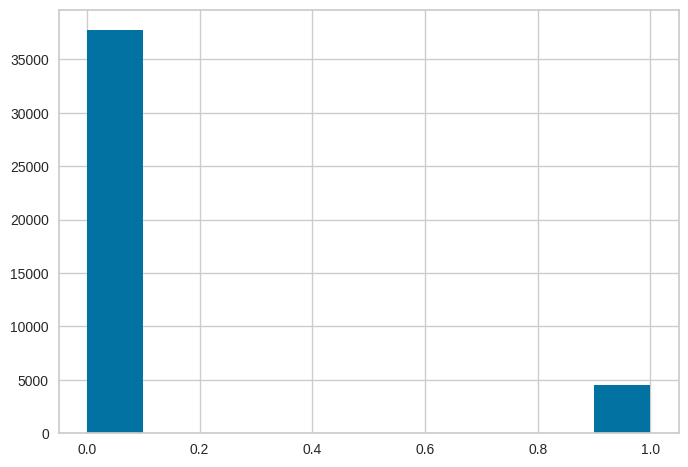

In [14]:
df_train.MIS_Status.hist()

In [15]:
df_ttrain, df_tval = train_test_split(df_train, train_size=0.8,random_state=1)

<AxesSubplot: >

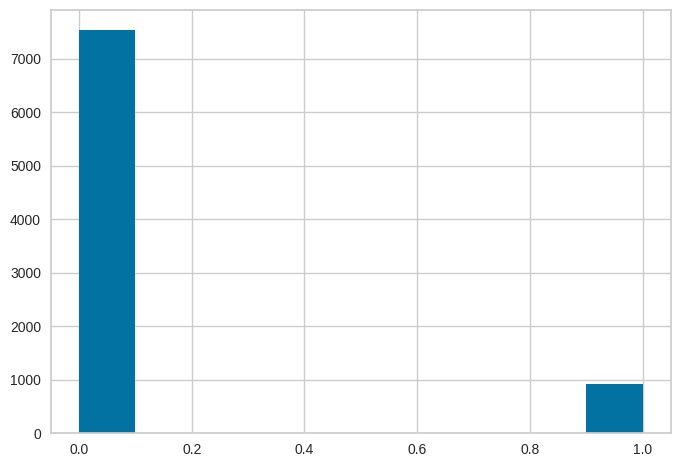

In [16]:
df_tval.MIS_Status.hist()

(33728, 60306, 60306)

In [45]:
ttrain_y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
60301    1
60302    1
60303    1
60304    1
60305    1
Name: MIS_Status, Length: 60306, dtype: int64

In [48]:
exp1 = setup(df_ttrain_resampled, target = 'MIS_Status')

,Description,Value
0,Session id,322
1,Target,MIS_Status
2,Target type,Binary
3,Original data shape,"(60306, 2840)"
4,Transformed data shape,"(60306, 2840)"
5,Transformed train set shape,"(42214, 2840)"
6,Transformed test set shape,"(18092, 2840)"
7,Numeric features,2839
8,Preprocess,True
9,Imputation type,simple


In [85]:
dir(exp1)

['USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_custom_pipeline',
 '_all_metrics',
 '_all_models',
 '_all_models_internal',
 '_attributes_to_not_save',
 '_available_plots',
 '_balance',
 '_bin_numerical_features',
 '_calculate_metrics',
 '_check_environment',
 '_check_setup_ran',
 '_choose_better',
 '_clean_column_names',
 '_convert_log_experiment',
 '_create_app_predict_kwargs',
 '_create_model',
 '_create_model_get_train_X_y',
 '_create_model_with_cv',
 '_create_model_without_cv',
 '_date_feature_engineering',
 '_display_container',
 '_encode_t

In [64]:
exp1.X_transformed

,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,RevLineCr_0,RevLineCr_Y,RevLineCr_N,RevLineCr_T,...,Sector,ApprovalDate,ApprovalFY,City,State,BankState,DisbursementGross,GrAppv,SBA_Appv,UrbanRural
33061,303.0,5.0,1.0,0.0,12.0,0.0,1.0,0.0,0.0,0.0,...,42.0,0.092875,2010.0,0.094146,0.119620,0.064565,0.092875,0.088483,0.088483,0.0
39054,38.0,1.0,2.0,2.0,26.0,0.0,0.0,1.0,0.0,0.0,...,33.0,0.142998,1994.0,0.148467,0.089312,0.111183,0.219457,0.218962,0.222989,2.0
28537,13.0,17.0,1.0,1.0,19.0,0.0,0.0,1.0,0.0,0.0,...,33.0,0.090047,1985.0,0.059507,0.036101,0.027283,0.086818,0.086818,0.086818,1.0
15228,32.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,54.0,0.143214,1997.0,0.073712,0.082192,0.084806,0.091843,0.121561,0.092496,1.0
20201,57.0,12.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,33.0,0.131737,2004.0,0.278274,0.088889,0.089333,0.095412,0.094018,0.097583,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19823,119.0,21.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.027322,2000.0,0.068191,0.100683,0.066265,0.077569,0.080963,0.092496,0.0
17991,59.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,32.0,0.035373,1999.0,0.097840,0.088889,0.089333,0.049261,0.049140,0.050378,1.0
41146,84.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,42.0,0.079113,1998.0,0.091509,0.089312,0.111183,0.108227,0.108227,0.108227,2.0
18891,240.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,23.0,0.094146,2009.0,0.132042,0.129577,0.089333,0.072007,0.105442,0.075432,0.0


In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:16:48
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [84]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9013,0.0000,0.2059,0.6340,0.3102,0.2719,0.3227,0.4740
et,Extra Trees Classifier,0.8998,0.7464,0.2075,0.6087,0.3089,0.2689,0.3150,2.8330
rf,Random Forest Classifier,0.8973,0.7402,0.2071,0.5705,0.3032,0.2608,0.3005,3.5260
lda,Linear Discriminant Analysis,0.8960,0.7605,0.2832,0.5362,0.3704,0.3196,0.3391,0.5900
gbc,Gradient Boosting Classifier,0.8941,0.7417,0.2173,0.5263,0.3070,0.2604,0.2907,4.7070
lr,Logistic Regression,0.8940,0.7344,0.0491,0.2887,0.0781,0.0677,0.0904,6.9410
ada,Ada Boost Classifier,0.8937,0.7388,0.2305,0.5193,0.3190,0.2706,0.2971,1.5670
lightgbm,Light Gradient Boosting Machine,0.8937,0.7335,0.2286,0.5186,0.3166,0.2686,0.2955,2.3980
dummy,Dummy Classifier,0.8918,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4680
xgboost,Extreme Gradient Boosting,0.8878,0.7236,0.2325,0.4628,0.3087,0.2552,0.2734,4.5080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=5776, solver='auto',
                tol=0.0001)